<a href="https://colab.research.google.com/github/Prasadkpd/Machine-Learning/blob/master/K-Nearest%20Neighbors/%20K_Nearest_Neighbors_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

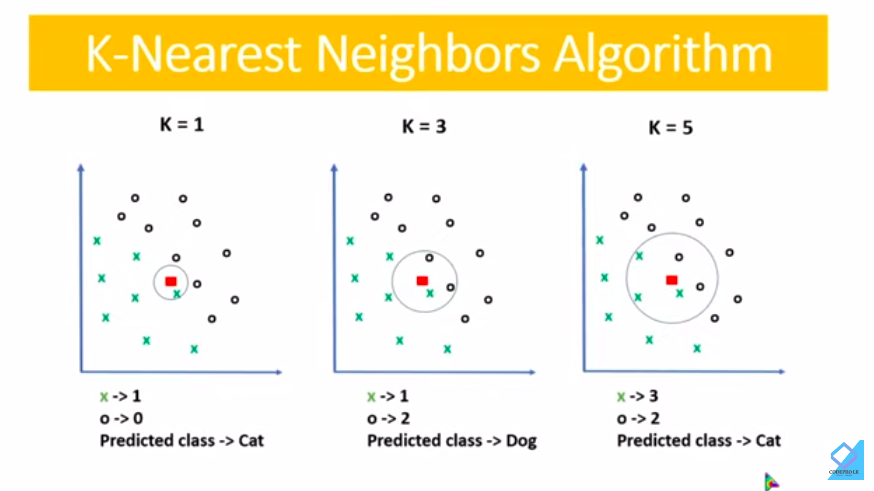

# How find Best K for algorithms

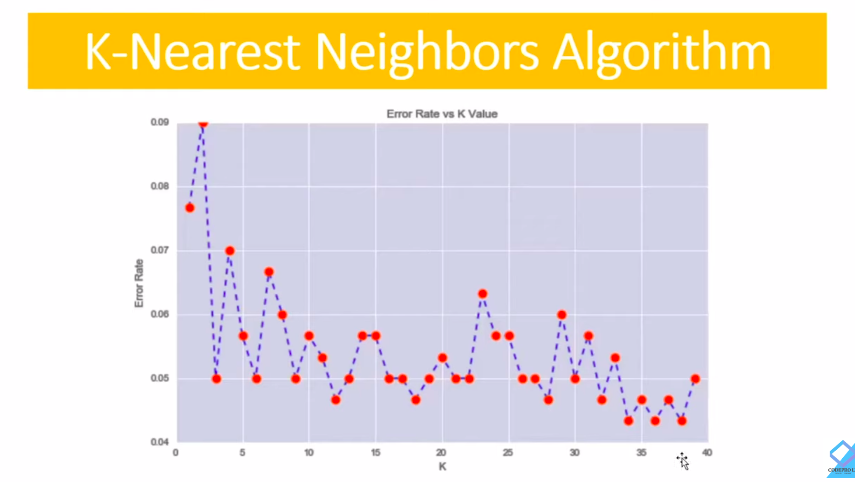

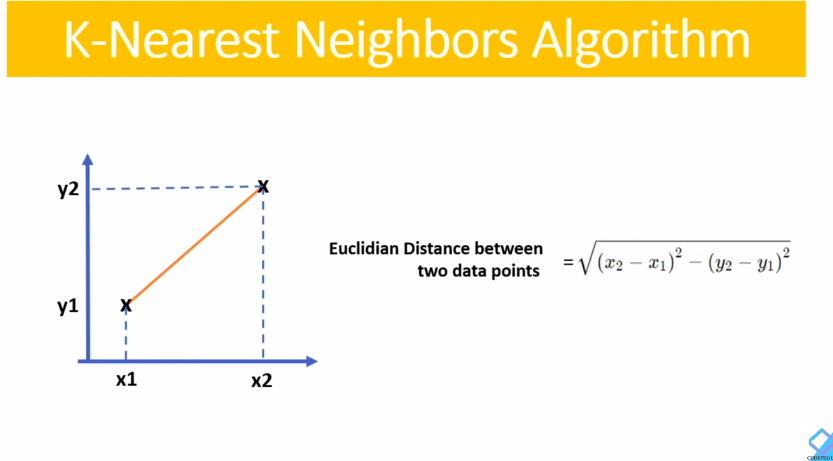

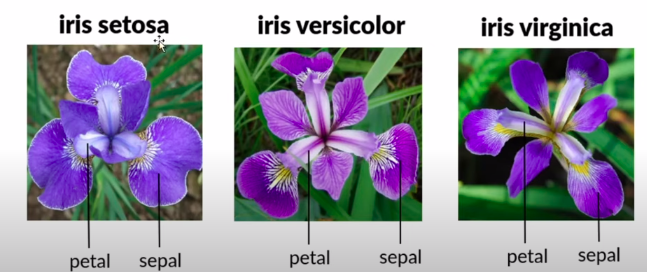

In [1]:
import numpy as np
import pandas as pd

In [4]:
data = pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
data.shape

(150, 6)

In [11]:
data["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [12]:
# Check is contain null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [16]:
# To get a idea about data
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [17]:
# There is change in scale
x = data.iloc[:,1:5]
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
y = data.iloc[:,-1]
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [20]:
# For feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [21]:
x = scaler.fit_transform(x)
x[0:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

In [23]:
# Train test split
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [24]:
x_train.shape

(120, 4)

In [26]:
x_test.shape

(30, 4)

In [27]:
# In this K value is consider as 1
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [28]:
pred = model.predict(x_test)
pred[0:5]

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica'], dtype=object)

In [29]:
y_test[0:5]

20         Iris-setosa
50     Iris-versicolor
78     Iris-versicolor
104     Iris-virginica
123     Iris-virginica
Name: Species, dtype: object

In [31]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred)
accuracy

0.9666666666666667

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
cm

array([[ 8,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 11]])

In [33]:
result = pd.DataFrame(data=[y_test.values, pred], index = ['y_test','pred'])
result.transpose()

,y_test,pred
0,Iris-setosa,Iris-setosa
1,Iris-versicolor,Iris-versicolor
2,Iris-versicolor,Iris-versicolor
3,Iris-virginica,Iris-virginica
4,Iris-virginica,Iris-virginica
5,Iris-versicolor,Iris-versicolor
6,Iris-versicolor,Iris-versicolor
7,Iris-setosa,Iris-setosa
8,Iris-virginica,Iris-virginica
9,Iris-setosa,Iris-setosa


In [36]:
# How find best K value
correct_sum = [] 
for i in range(1,20): 
  model = KNeighborsClassifier(n_neighbors=i) 
  model.fit(x_train,y_train) 
  pred = model.predict(x_test) 
  correct = np.sum(pred == y_test) 
  correct_sum.append(correct)

In [37]:
correct_sum

[29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 29, 29, 29, 29, 29]

In [38]:
result = pd.DataFrame(data=correct_sum)
result.index = result.index + 1
result.T

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,29,29,29,29,29,30,30,30,30,30,30,30,30,30,29,29,29,29,29


In [39]:
model = KNeighborsClassifier(n_neighbors=8)
model.fit(x_train,y_train)
pred = model.predict(x_test)

In [40]:
accuracy_score(y_test,pred)

1.0

In [41]:
confusion_matrix(y_test,pred)

array([[ 8,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 11]])